In [ ]:
print("hello world")

hello world


In [ ]:
import pandas as pd
# 1. Load df
df1 = pd.read_csv('/content/sample_1000_rows.csv')
df = pd.read_csv('/content/HACKATHON_TRAINING_DATA.CSV')

# 2. Compute unique counts
#uniques = df.nunique()

# 3. Filter for small-cardinality columns
# small = uniques[uniques <= 5]
# print(small)
print(df1['TARGET'].value_counts())
print(df1['TARGET'].value_counts(normalize=True))

print(df['TARGET'].value_counts(normalize=True))
print(df['TARGET'].value_counts())


TARGET
0    930
1     70
Name: count, dtype: int64
TARGET
0    0.93
1    0.07
Name: proportion, dtype: float64
TARGET
0.0    0.896192
1.0    0.103808
Name: proportion, dtype: float64
TARGET
0.0    35275
1.0     4086
Name: count, dtype: int64


1,000-row sample:

930 non-defaulters vs. 70 defaulters → 7% defaulters

Full 300K-row set:

~292 k non-defaulters vs. ~35 k defaulters → 10.8% defaulters

Why Class Imbalance Matters
Metric choice

Accuracy can be misleading (e.g., a dumb model that always predicts “0” would be ~89–93% accurate!).

Better metrics: precision, recall, F1-score, ROC-AUC, especially focusing on the minority (defaulter) class.

Model bias

Many algorithms will favor the majority class by default, so you may get poor sensitivity (low recall) on defaulters.

Remedies

Data-level: oversample the minority (SMOTE), undersample the majority, or create class-balanced batches.

Algorithm-level: adjust class weights (e.g., class_weight='balanced' in scikit-learn), threshold tuning, or specialized algorithms.

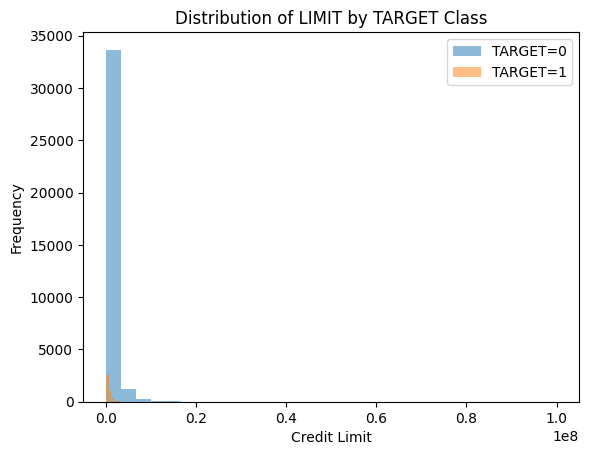

In [ ]:
import matplotlib.pyplot as plt

# Example for the feature 'LIMIT'
for cls in [0, 1]:
    subset = df[df['TARGET'] == cls]['LIMIT']
    plt.hist(subset, bins=30, alpha=0.5, label=f'TARGET={cls}')

plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of LIMIT by TARGET Class')
plt.show()


In [ ]:
import pandas as pd

# Load original file
df_full = pd.read_csv('C:\\Users\\veer\\Desktop\\sbi hackathon\\HACKATHON_TRAINING_DATA.CSV')  # Change path if local

# Dataset 1: Drop rows with any nulls
df_dropped = df_full.dropna(axis=0, how='any')

# Dataset 2: Impute nulls
df_imputed = df_full.copy()

# Fill numeric columns with median
num_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df_imputed[col].fillna(df_imputed[col].median(), inplace=True)

# Fill categorical columns with "null"
cat_cols = df_imputed.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_imputed[col].fillna("null", inplace=True)

# Save cleaned datasets
df_dropped.to_csv('C:\\Users\\veer\\Desktop\\sbi hackathon\\HACKATHON_TRAINING_DATA_dropped.csv', index=False)
df_imputed.to_csv('C:\\Users\\veer\\Desktop\\sbi hackathon\\HACKATHON_TRAINING_DATA_imputed.csv', index=False)

# Print summary
print("Original dataset shape:", df_full.shape)
print("Dropped NA dataset shape:", df_dropped.shape)
print("Imputed dataset shape:", df_imputed.shape)

# Optional: preview
df_dropped.head()


Original dataset shape: (327741, 139)
Dropped NA dataset shape: (6760, 139)
Imputed dataset shape: (327741, 139)


,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,SI_FLG,AGE,VINTAGE,KYC_SCR,...,CREDIT_HISTORY_LENGTH1,NO_OF_INQUIRIES1,INCOME_BAND1,AGREG_GROUP,PRODUCT_TYPE,LATEST_CR_DAYS,LATEST_DR_DAYS,TIME_PERIOD,TARGET,UNIQUE_ID
22,1.761,205300.0,121912.73,1.240,1096,6781.0,Y,26.735,9.198,110.0,...,2yrs 3mon,0.0,D,#Total Xpress Credit,PERSONAL LOAN,124.0,45656,DEC24,0,4049
23,1.846,205300.0,116504.73,1.156,1096,6781.0,Y,26.820,9.283,110.0,...,2yrs 3mon,0.0,D,#Total Xpress Credit,PERSONAL LOAN,4.0,45687,JAN25,1,4050
96,4.233,1005500.0,532164.32,2.766,2556,15462.0,Y,45.933,12.719,110.0,...,7yrs 10mon,5.0,F,#Total Auto Loan,AUTO LOAN,60.0,45687,JAN25,0,1276
97,4.064,1005500.0,555360.32,2.935,2556,15462.0,Y,45.763,12.549,110.0,...,7yrs 10mon,5.0,F,#Total Auto Loan,AUTO LOAN,56.0,45625,NOV24,0,1277
108,1.900,204100.0,113377.24,1.101,1096,6740.0,Y,30.864,10.509,110.0,...,7yrs 5mon,0.0,E,#Total Xpress Credit,PERSONAL LOAN,143.0,45687,JAN25,0,1050


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/HACKATHON_TRAINING_DATA_imputed.csv')

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (327741, 139)


,ACCT_AGE,LIMIT,OUTS,ACCT_RESIDUAL_TENURE,LOAN_TENURE,INSTALAMT,SI_FLG,AGE,VINTAGE,KYC_SCR,...,CREDIT_HISTORY_LENGTH1,NO_OF_INQUIRIES1,INCOME_BAND1,AGREG_GROUP,PRODUCT_TYPE,LATEST_CR_DAYS,LATEST_DR_DAYS,TIME_PERIOD,TARGET,UNIQUE_ID
0,1.613,1005500.0,494161.89,0.890,914,38513.0,Y,57.663,18.601,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,60.0,45625,NOV24,0,2032
1,1.783,1005500.0,428072.24,0.720,914,38513.0,Y,57.833,18.771,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,28.0,45687,JAN25,0,2033
2,1.698,1005500.0,461364.10,0.805,914,38513.0,Y,57.748,18.686,110.0,...,7yrs 6mon,0.0,G,#Total Xpress Credit,PERSONAL LOAN,28.0,45656,DEC24,0,2034
3,9.127,1005500.0,1204287.25,17.878,9862,12736.0,Y,52.302,14.039,110.0,...,10yrs 8mon,1.0,D,#Housing Loan,HOME LOAN,3.0,45625,NOV24,0,2035
4,9.296,1005500.0,1203224.25,17.708,9862,12736.0,Y,52.472,14.209,110.0,...,10yrs 8mon,1.0,D,#Housing Loan,HOME LOAN,2.0,45687,JAN25,0,2036


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327741 entries, 0 to 327740
Columns: 139 entries, ACCT_AGE to UNIQUE_ID
dtypes: float64(117), int64(10), object(12)
memory usage: 347.6+ MB


In [ ]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ACCT_AGE,327741.0,NaN,NaN,NaN,4.637672,3.898602,0.164,1.706,3.111,6.498,26.454
LIMIT,327741.0,NaN,NaN,NaN,998597.065738,1516311.438243,14700.0,265500.0,665500.0,1177500.0,144905500.0
OUTS,327741.0,NaN,NaN,NaN,813507.412176,1480802.666155,0.0,142915.54,429567.35,928660.25,82297496.9
ACCT_RESIDUAL_TENURE,327741.0,NaN,NaN,NaN,6.445322,7.048126,-0.241,1.862,3.976,7.314,35.613
LOAN_TENURE,327741.0,NaN,NaN,NaN,4047.234356,3097.675869,183.0,2191.0,2434.0,6209.0,13515.0
...,...,...,...,...,...,...,...,...,...,...,...
LATEST_CR_DAYS,327741.0,NaN,NaN,NaN,49.717661,103.429434,0.0,13.0,26.0,59.0,2737.0
LATEST_DR_DAYS,327741.0,NaN,NaN,NaN,45656.17962,25.288253,45625.0,45625.0,45656.0,45687.0,45687.0
TIME_PERIOD,327741,3,JAN25,110002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TARGET,327741.0,NaN,NaN,NaN,0.108134,0.31055,0.0,0.0,0.0,0.0,1.0


In [ ]:
df['TARGET'].value_counts(normalize=True)


,proportion
TARGET,
0,0.891866
1,0.108134


In [ ]:
print(df.nunique().sort_values())


EKYC_FLG                 2
INB_FLG                  2
TARGET                   2
SI_FLG                   2
UID_FLG                  2
                     ...  
TWELVEMNTHAVGYTD    268678
ELEVENMNTHAVGYTD    269067
OUTS                320626
ALL_LON_OUTS        322572
UNIQUE_ID           327741
Length: 139, dtype: int64


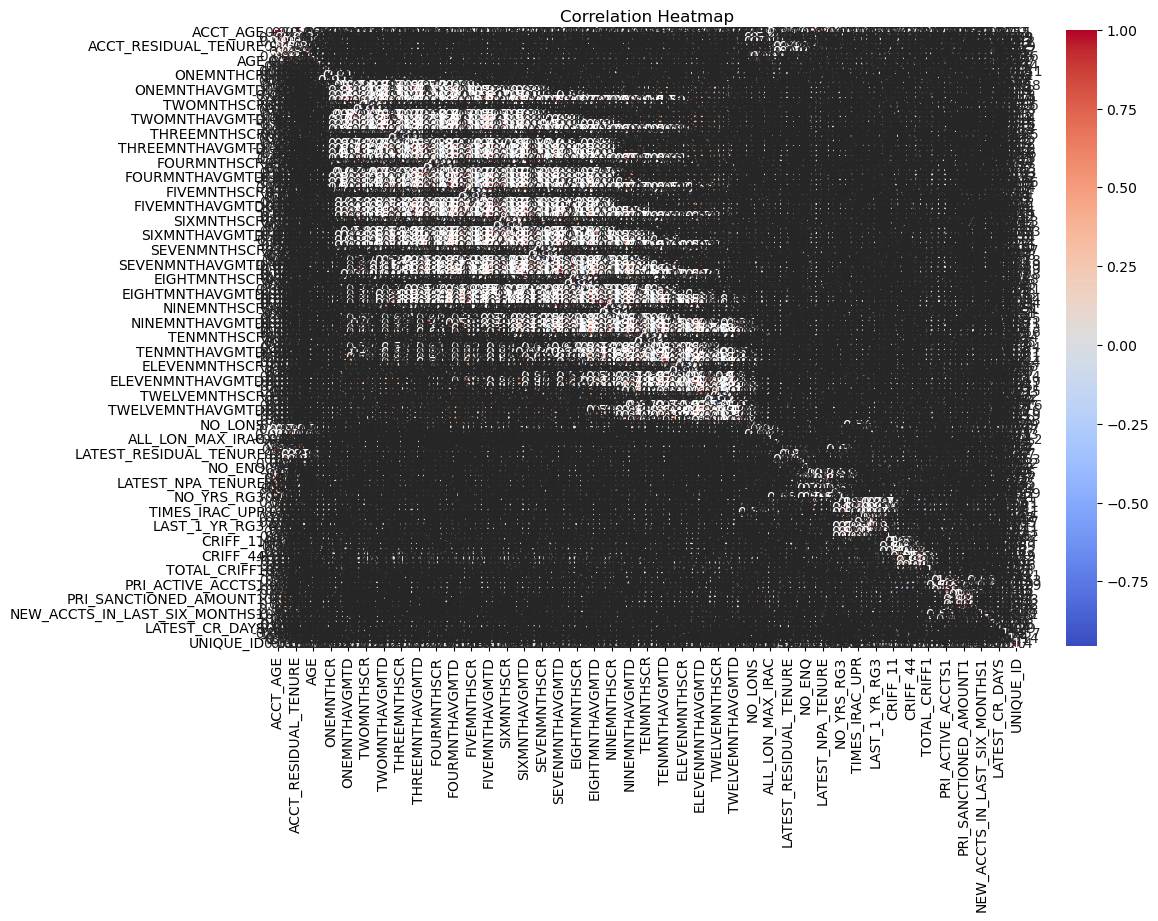

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df.select_dtypes(include=['int64', 'float64']).columns


Index(['ACCT_AGE', 'LIMIT', 'OUTS', 'ACCT_RESIDUAL_TENURE', 'LOAN_TENURE',
       'INSTALAMT', 'AGE', 'VINTAGE', 'KYC_SCR', 'ONEMNTHCR',
       ...
       'PRI_SANCTIONED_AMOUNT1', 'PRI_DISBURSED_AMOUNT1',
       'PRIMARY_INSTAL_AMT1', 'NEW_ACCTS_IN_LAST_SIX_MONTHS1',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1', 'NO_OF_INQUIRIES1',
       'LATEST_CR_DAYS', 'LATEST_DR_DAYS', 'TARGET', 'UNIQUE_ID'],
      dtype='object', length=127)

In [ ]:
len(df.select_dtypes(include=['int64', 'float64']).columns)


127

In [ ]:
# Compute full correlation matrix (numeric only)
corr = df.corr(numeric_only=True)

# Extract correlations of every feature with TARGET (excluding TARGET itself)
target_corr = corr['TARGET'].drop('TARGET').sort_values()

# View the 10 strongest negative and 10 strongest positive correlations
print("Top 10 Negative Correlations with TARGET:")
print(target_corr.head(10))
print("\nTop 10 Positive Correlations with TARGET:")
print(target_corr.tail(10))


Top 10 Negative Correlations with TARGET:
CRIFF_11          -0.202403
TIMES_IRAC_SLIP   -0.181195
TIMES_IRAC_UPR    -0.161919
CRIFF_22          -0.145228
LOAN_TENURE       -0.140353
NO_YRS_RG3        -0.135230
LAST_1_YR_RG2     -0.134234
ACCT_AGE          -0.124073
LAST_1_YR_RG3     -0.121240
TOT_IRAC_CHNG     -0.116612
Name: TARGET, dtype: float64

Top 10 Positive Correlations with TARGET:
TWELVEMNTHSCR                           0.046959
TENMNTHSCR                              0.047254
NO_ENQ                                  0.047496
ALL_LON_MAX_IRAC                        0.054174
CRIFF_55                                0.066142
PRI_OVERDUE_ACCTS1                      0.077699
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1    0.088020
CRIFF_66                                0.090058
DEC_CRIFFCHNG1                          0.097502
LATEST_CR_DAYS                          0.115355
Name: TARGET, dtype: float64


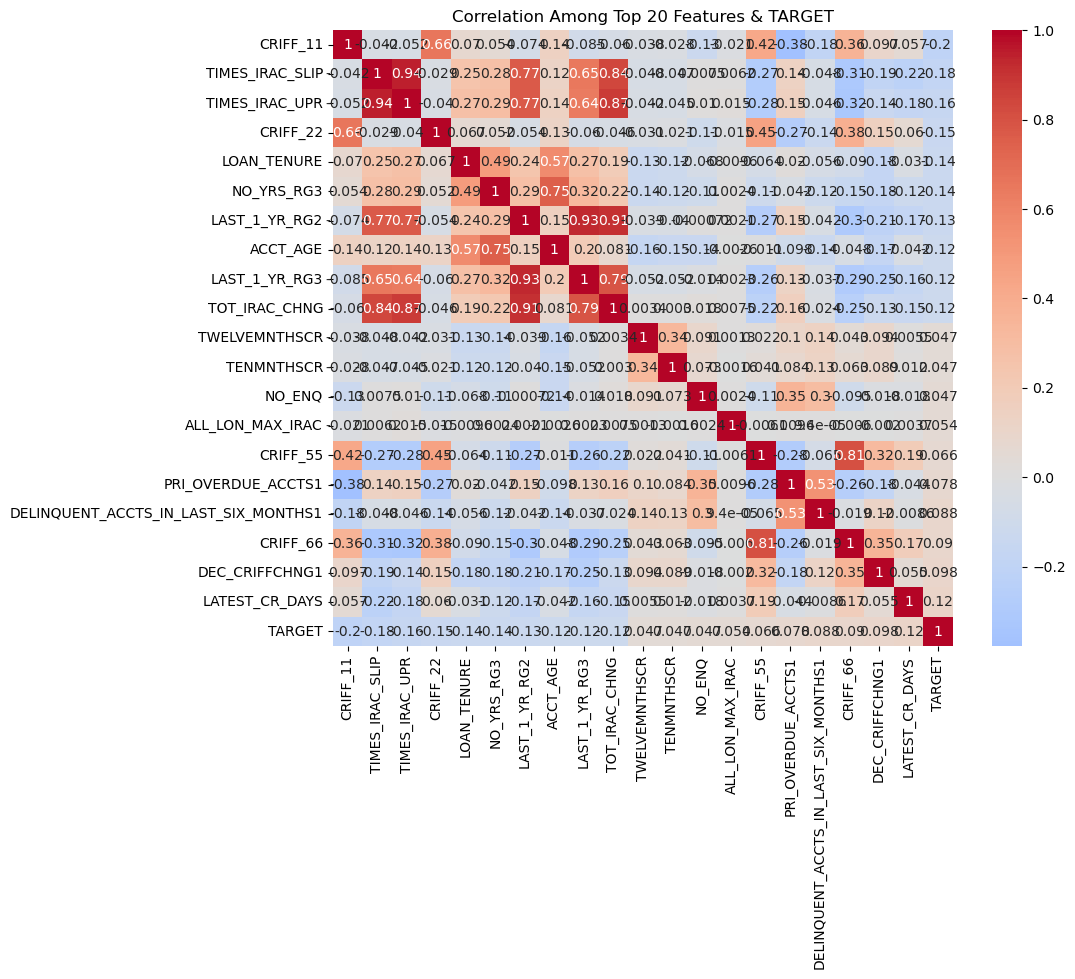

In [ ]:
# Take the names of the top 10 positive and top 10 negative
features_to_plot = list(target_corr.head(10).index) + list(target_corr.tail(10).index)

# Subset the correlation matrix to those features + TARGET
sub_corr = corr.loc[features_to_plot + ['TARGET'], features_to_plot + ['TARGET']]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(sub_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Among Top 20 Features & TARGET")
plt.show()


In [ ]:
# 1. Compute correlation matrix (numeric only)
corr = df.corr(numeric_only=True)

# 2. Pull out the 'TARGET' column, drop its self-correlation, and sort
target_corr = corr['TARGET'].drop('TARGET').sort_values()

# 3. See the extremes
print("Top 10 Negative Correlations with TARGET:")
print(target_corr.head(10))
print("\nTop 10 Positive Correlations with TARGET:")
print(target_corr.tail(10))


Top 10 Negative Correlations with TARGET:
CRIFF_11          -0.202403
TIMES_IRAC_SLIP   -0.181195
TIMES_IRAC_UPR    -0.161919
CRIFF_22          -0.145228
LOAN_TENURE       -0.140353
NO_YRS_RG3        -0.135230
LAST_1_YR_RG2     -0.134234
ACCT_AGE          -0.124073
LAST_1_YR_RG3     -0.121240
TOT_IRAC_CHNG     -0.116612
Name: TARGET, dtype: float64

Top 10 Positive Correlations with TARGET:
TWELVEMNTHSCR                           0.046959
TENMNTHSCR                              0.047254
NO_ENQ                                  0.047496
ALL_LON_MAX_IRAC                        0.054174
CRIFF_55                                0.066142
PRI_OVERDUE_ACCTS1                      0.077699
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS1    0.088020
CRIFF_66                                0.090058
DEC_CRIFFCHNG1                          0.097502
LATEST_CR_DAYS                          0.115355
Name: TARGET, dtype: float64


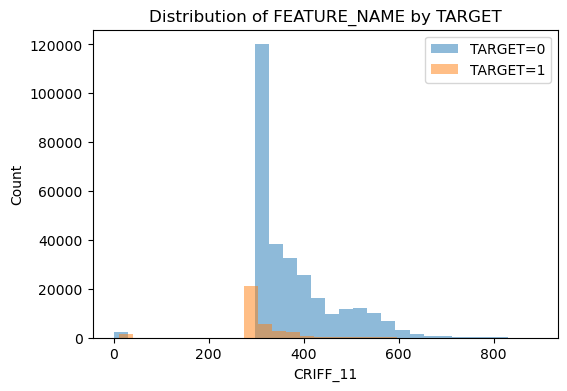

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
for cls in [0, 1]:
    plt.hist(
        df[df['TARGET']==cls]['CRIFF_11'],
        bins=30, alpha=0.5, label=f'TARGET={cls}'
    )
plt.legend()
plt.title(f'Distribution of FEATURE_NAME by TARGET')
plt.xlabel('CRIFF_11')
plt.ylabel('Count')
plt.show()


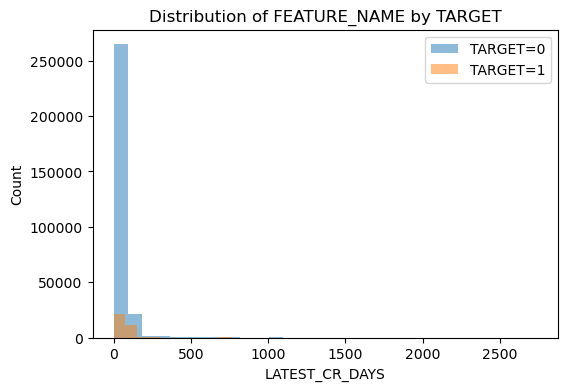

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
for cls in [0, 1]:
    plt.hist(
        df[df['TARGET']==cls]['LATEST_CR_DAYS'],
        bins=30, alpha=0.5, label=f'TARGET={cls}'
    )
plt.legend()
plt.title(f'Distribution of FEATURE_NAME by TARGET')
plt.xlabel('LATEST_CR_DAYS')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# X is all features, y is TARGET
X = df.drop(columns='TARGET')
y = df['TARGET']

# 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
# Split temp equally into Val and Test (15% each of original)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)
print("Train defaulter ratio:", y_train.mean())


Train: (229418, 138) Val: (49161, 138) Test: (49162, 138)
Train defaulter ratio: 0.10813449685726491


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose   import ColumnTransformer
from sklearn.pipeline  import Pipeline

# Identify column types
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()

# Build transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols),
])


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)
class_weight_dict = dict(zip(classes, class_weights))
print("Class weights:", class_weight_dict)


Class weights: {np.int64(0): np.float64(0.5606226479644201), np.int64(1): np.float64(4.623871331828442)}


In [ ]:
!pip install tensorflow


In [ ]:
# 1. Fit on train
preprocessor.fit(X_train)

# 2. Transform train and val (and later test)
X_train_proc = preprocessor.transform(X_train)
X_val_proc   = preprocessor.transform(X_val)


In [ ]:
print("Processed train shape:", X_train_proc.shape)


Processed train shape: (229418, 801)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

input_dim = X_train_proc.shape[1]

model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['AUC', 'Precision', 'Recall']
)


In [ ]:
history = model.fit(
    X_train_proc, y_train,
    validation_data=(X_val_proc, y_val),
    epochs=20,
    batch_size=512,
    class_weight=class_weight_dict
)


Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - AUC: 0.7654 - Precision: 0.2231 - Recall: 0.7170 - loss: 0.5805 - val_AUC: 0.8336 - val_Precision: 0.2842 - val_Recall: 0.7404 - val_loss: 0.4863
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - AUC: 0.8280 - Precision: 0.2724 - Recall: 0.7539 - loss: 0.5166 - val_AUC: 0.8401 - val_Precision: 0.2777 - val_Recall: 0.7671 - val_loss: 0.4995
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - AUC: 0.8401 - Precision: 0.2808 - Recall: 0.7700 - loss: 0.4988 - val_AUC: 0.8449 - val_Precision: 0.2852 - val_Recall: 0.7619 - val_loss: 0.4776
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - AUC: 0.8457 - Precision: 0.2847 - Recall: 0.7765 - loss: 0.4915 - val_AUC: 0.8467 - val_Precision: 0.2761 - val_Recall: 0.7876 - val_loss: 0.5053
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - AUC: 0.8515 - Precision: 0.2905 - Recall: 0.7809 - loss: 0.4824 - val_AUC: 0.8476 - val_Precision: 0.2941 - val_Recall: 0.7590 - val_loss: 0.45

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='val_auc',
    mode='max',
    patience=3,     # allow 3 epochs of no improvement
    restore_best_weights=True
)

history = model.fit(
    X_train_proc, y_train,
    validation_data=(X_val_proc, y_val),
    epochs=50,          # increase max epochs
    batch_size=512,
    class_weight=class_weight_dict,
    callbacks=[es]
)


Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - AUC: 0.8853 - Precision: 0.2968 - Recall: 0.8498 - loss: 0.4221 - val_AUC: 0.8502 - val_Precision: 0.2728 - val_Recall: 0.8019 - val_loss: 0.4665
Epoch 2/50
 14/449 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - AUC: 0.8851 - Precision: 0.2889 - Recall: 0.8529 - loss: 0.4144

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,Precision,Recall,loss,val_AUC,val_Precision,val_Recall,val_loss
  current = self.get_monitor_value(logs)


449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - AUC: 0.8872 - Precision: 0.2979 - Recall: 0.8500 - loss: 0.4159 - val_AUC: 0.8520 - val_Precision: 0.2643 - val_Recall: 0.8220 - val_loss: 0.4839
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - AUC: 0.8867 - Precision: 0.2965 - Recall: 0.8538 - loss: 0.4180 - val_AUC: 0.8499 - val_Precision: 0.2714 - val_Recall: 0.8076 - val_loss: 0.4710
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - AUC: 0.8876 - Precision: 0.2992 - Recall: 0.8522 - loss: 0.4150 - val_AUC: 0.8525 - val_Precision: 0.2725 - val_Recall: 0.8091 - val_loss: 0.4605
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - AUC: 0.8870 - Precision: 0.2947 - Recall: 0.8644 - loss: 0.4188 - val_AUC: 0.8501 - val_Precision: 0.2684 - val_Recall: 0.8113 - val_loss: 0.4714
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - AUC: 0.8883 - Precision: 0.2967 - Recall: 0.8577 - loss: 0.4131 - val_AUC: 0.8510 - val_Precision: 0.2783 - val_Recall: 0.8006 - val_loss: 0.4461
Epoch 7/5

In [ ]:
layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(1e-4))


<Dense name=dense_3, built=False>

In [ ]:
# Inspect available metrics in history
print(history.history.keys())


dict_keys(['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss'])


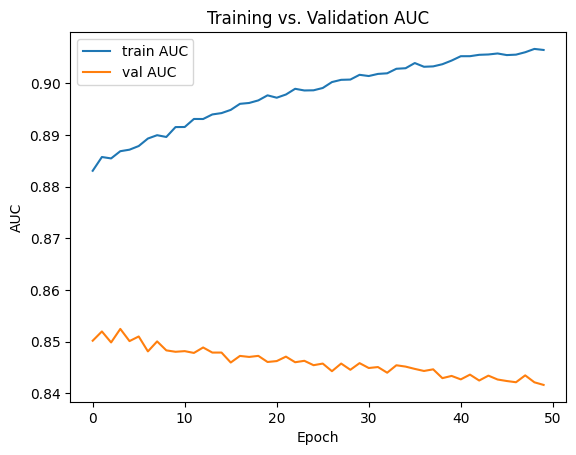

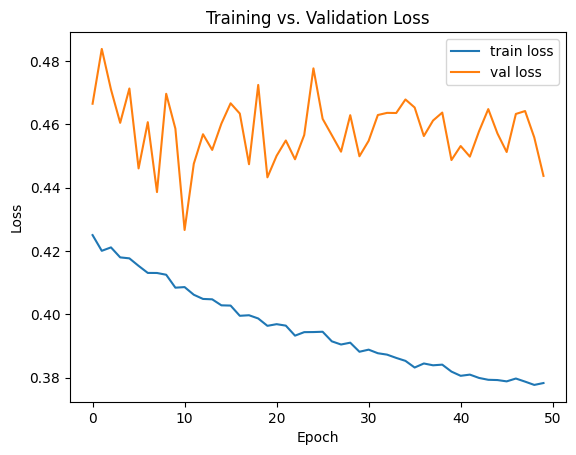

In [ ]:
import matplotlib.pyplot as plt

# AUC Curve
plt.plot(history.history['AUC'],     label='train AUC')
plt.plot(history.history['val_AUC'], label='val AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.title('Training vs. Validation AUC')
plt.show()

# Loss Curve
plt.plot(history.history['loss'],      label='train loss')
plt.plot(history.history['val_loss'],  label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='val_AUC',    # watch validation AUC
    mode='max',           # we want AUC to go UP
    patience=3,           # allow 3 epochs of no improvement
    restore_best_weights=True
)

history_es = model.fit(
    X_train_proc, y_train,
    validation_data=(X_val_proc, y_val),
    epochs=50,            # give plenty of room
    batch_size=512,
    class_weight=class_weight_dict,
    callbacks=[es]
)


Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - AUC: 0.9084 - Precision: 0.3230 - Recall: 0.8908 - loss: 0.3735 - val_AUC: 0.8424 - val_Precision: 0.2755 - val_Recall: 0.7837 - val_loss: 0.4494
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - AUC: 0.9066 - Precision: 0.3177 - Recall: 0.8912 - loss: 0.3782 - val_AUC: 0.8431 - val_Precision: 0.2862 - val_Recall: 0.7666 - val_loss: 0.4441
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - AUC: 0.9086 - Precision: 0.3226 - Recall: 0.8951 - loss: 0.3737 - val_AUC: 0.8424 - val_Precision: 0.2719 - val_Recall: 0.7908 - val_loss: 0.4679
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - AUC: 0.9087 - Precision: 0.3204 - Recall: 0.8932 - loss: 0.3755 - val_AUC: 0.8418 - val_Precision: 0.2740 - val_Recall: 0.7884 - val_loss: 0.4615
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - AUC: 0.9075 - Precision: 0.3184 - Recall: 0.8923 - loss: 0.3756 - val_AUC: 0.8425 - val_Precision: 0.2765 - val_Recall: 0.7801 - val_loss: 0.4468


In [ ]:
model.evaluate(X_val_proc, y_val)


1537/1537 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8466 - Precision: 0.2913 - Recall: 0.7744 - loss: 0.4402


[0.44405606389045715,
 0.843110203742981,
 0.2862461507320404,
 0.7665538191795349]

In [ ]:
import pandas as pd

# 1. Read in the raw test data
df_test_raw = pd.read_csv('/content/drive/MyDrive/sbi hackathon/sample_1000_rows.csv')

print("Raw test shape:", df_test_raw.shape)


Raw test shape: (1000, 139)


In [ ]:
print(df.shape)

(327741, 139)


In [ ]:
print(df_test_raw.shape)

(1000, 139)


In [ ]:
import pandas as pd

# 1. Reload (or refer to) your cleaned training DataFrame
#    (this should be df_full or df, before you dropped/filled NA)
df_train = pd.read_csv('/content/drive/MyDrive/HACKATHON_TRAINING_DATA.CSV')

# 2. Compute the medians for every numeric column
num_cols = df_train.select_dtypes(include=['int64','float64']).columns.tolist()
median_dict = { col: df_train[col].median() for col in num_cols }

# 3. Identify your categorical columns
cat_cols = df_train.select_dtypes(include=['object','category']).columns.tolist()


In [ ]:
# 2A. Numeric imputation: fill with TRAINING medians
#    (we’ll assume you have your training medians stored in a dict called 'median_dict')
for col, med in median_dict.items():
    df_test_raw[col].fillna(med, inplace=True)

# 2B. Categorical imputation: fill with the string 'null'
for col in cat_cols:   # same list you used for training
    df_test_raw[col].fillna('null', inplace=True)


<ipython-input-27-63b5f8ebb53c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_raw[col].fillna(med, inplace=True)
<ipython-input-27-63b5f8ebb53c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
# 3A. Extract y_test
y_test = df_test_raw['TARGET'].values

# 3B. Drop TARGET from feature set
X_test_raw = df_test_raw.drop(columns='TARGET')


In [ ]:
# 4. Transform raw test features into scaled/encoded form
X_test_proc = preprocessor.transform(X_test_raw)

print("Processed test shape:", X_test_proc.shape)


Processed test shape: (1000, 801)


In [ ]:
print(type(X_test_proc), getattr(X_test_proc, 'shape', None))
print(type(y_test),       getattr(y_test,       'shape', None))


<class 'numpy.ndarray'> (1000, 801)
<class 'numpy.ndarray'> (1000,)


In [ ]:
# 1. Get predicted probabilities and binary predictions
y_pred_prob = model.predict(X_test_proc).flatten()
y_pred      = (y_pred_prob > 0.5).astype(int)

# 2. Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 3. Classification report (precision, recall, F1)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# 4. Compute AUC explicitly
from sklearn.metrics import roc_auc_score
print("Test ROC-AUC:", roc_auc_score(y_test, y_pred_prob))


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Confusion Matrix:
 [[721 209]
 [ 10  60]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9863    0.7753    0.8682       930
           1     0.2230    0.8571    0.3540        70

    accuracy                         0.7810      1000
   macro avg     0.6047    0.8162    0.6111      1000
weighted avg     0.9329    0.7810    0.8322      1000

Test ROC-AUC: 0.8925345622119816


Class	Precision	Recall	F1	Support
Non-def (0)	0.9863	0.7753	0.8682	930
Defaulter (1)	0.2230	0.8571	0.3540	70
Overall Accuracy			0.7810	1000
ROC-AUC			0.8925

High recall (0.857) on defaulters means you’re catching most of the actual defaulters.

Low precision (0.223) on defaulters means out of every 100 “defaulter” predictions, ~78 are actually non-defaulters.

Overall accuracy (78%) is misleading due to class imbalance.

ROC-AUC (0.893) shows the model ranks defaulters above non-defaulters well overall.